Saving 63e24a5841e09.webp to 63e24a5841e09 (2).webp
Saving istockphoto-533837393-612x612.jpg to istockphoto-533837393-612x612 (2).jpg


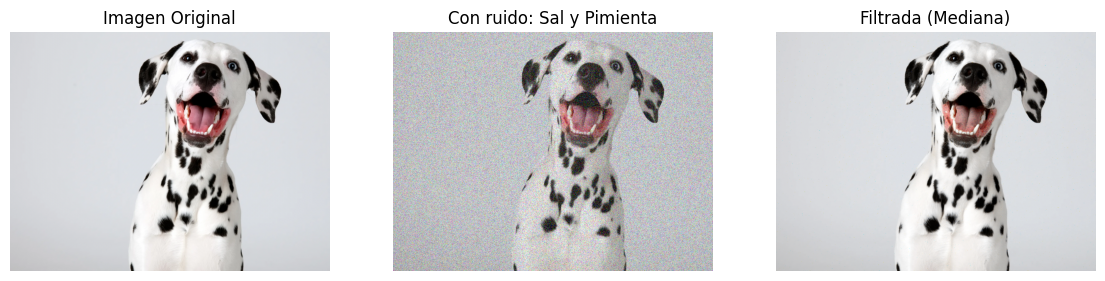

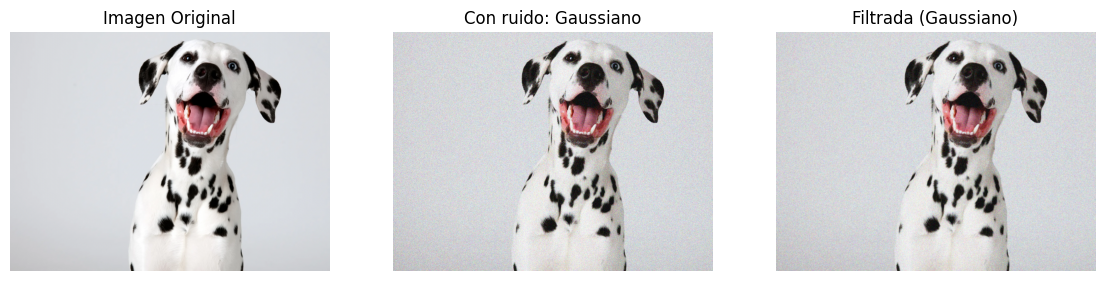

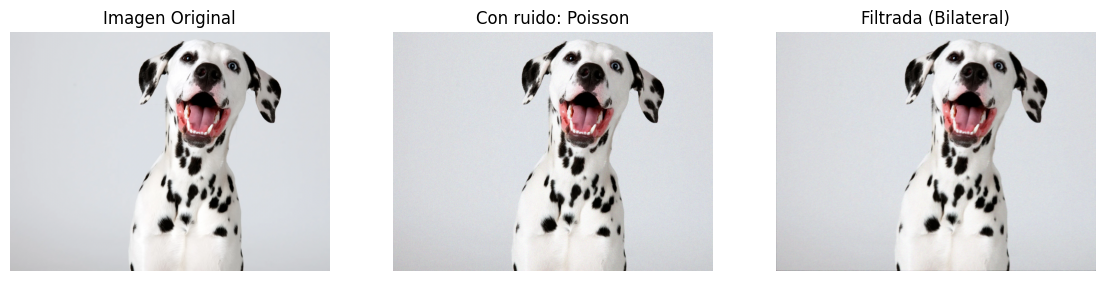

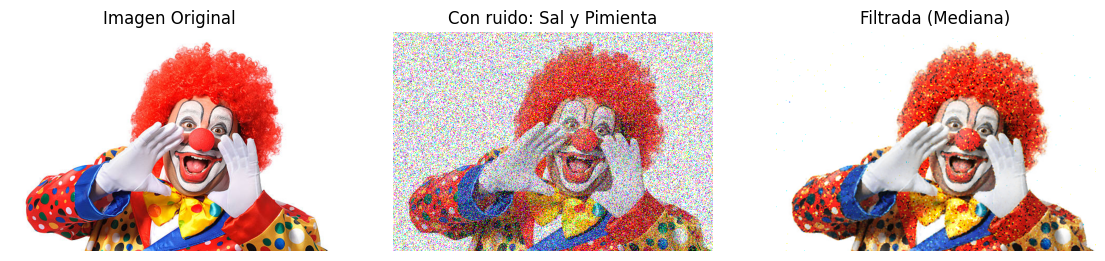

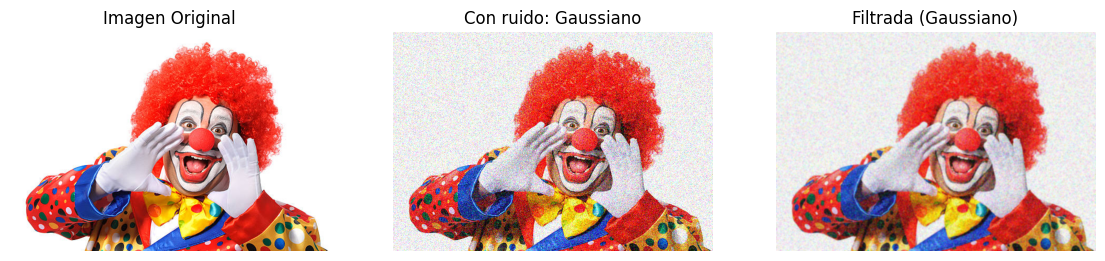

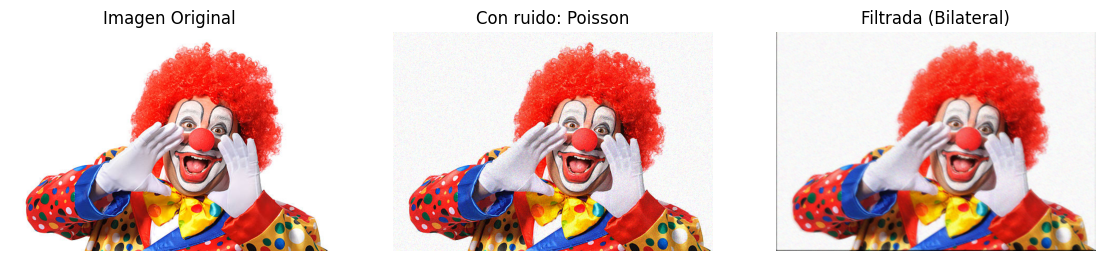

In [3]:
# LABORATORIO DE RUIDO Y FILTRADO DE IMAGENES

# 1. librerías Utilizadas
from google.colab import files
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.restoration import denoise_bilateral, denoise_nl_means, denoise_wavelet, denoise_tv_chambolle
from skimage.filters import median, gaussian
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
import numpy as np

# 2. Carga de imágenes desde el PC
uploaded = files.upload()
img_paths = list(uploaded.keys())

# Convertir imágenes a float para procesarlas
images = [img_as_float(io.imread(p)) for p in img_paths]

# 3. Visualizacion de imágenes

def mostrar(original, ruidosa, filtrada, titulo_ruido, titulo_filtro):
    fig, axes = plt.subplots(1, 3, figsize=(14, 5))
    axes[0].imshow(original, cmap="gray")
    axes[0].set_title("Imagen Original")
    axes[0].axis("off")

    axes[1].imshow(ruidosa, cmap="gray")
    axes[1].set_title(f"Con ruido: {titulo_ruido}")
    axes[1].axis("off")

    axes[2].imshow(filtrada, cmap="gray")
    axes[2].set_title(f"Filtrada ({titulo_filtro})")
    axes[2].axis("off")

    plt.show()

# 4. Aplicacion del procesamiento de imagen original, ruido y filtro

for img in images:
    # Ruido sal y pimienta y filtrado mediana
    ruido_sp = random_noise(img, mode="s&p", amount=0.3)
    filtrada_sp = median_filter(ruido_sp, size=3)
    mostrar(img, ruido_sp, filtrada_sp, "Sal y Pimienta", "Mediana")

    # Ruido gaussiano y filtrado gaussiano
    ruido_g = random_noise(img, mode="gaussian", var=0.03)
    filtrada_g = gaussian(ruido_g, sigma=1, channel_axis=-1)
    mostrar(img, ruido_g, filtrada_g, "Gaussiano", "Gaussiano")

    # Ruido Poisson y filtrado Bilateral
    ruido_p = random_noise(img, mode="poisson")
    filtrada_p = denoise_bilateral(ruido_p, channel_axis=-1)
    mostrar(img, ruido_p, filtrada_p, "Poisson", "Bilateral")


